In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

import excursion
import excursion.testcases.fast as scandetails
import excursion.optimize
import numpy as np
import datetime

np.warnings.filterwarnings('ignore')


/Users/lukas/Code/venv/lib/python3.6/site-packages/numpy/lib/index_tricks.py:199: ComplexWarning: Casting complex values to real discards the imaginary part
  nn[k] = (nn[k]*step+start)


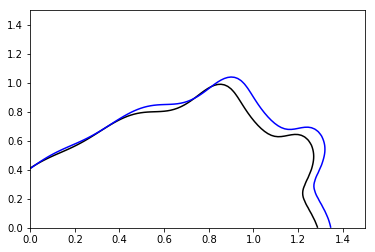

In [3]:

grid = ix,iy = scandetails.plotG
X = excursion.utils.mesh2points(grid,scandetails.plot_rangedef[:,2])

functions = [
    scandetails.truth,
    lambda X: scandetails.truth(X-0.05)
]


scandetails.truth_functions = functions


truthv = excursion.utils.values2mesh(
    scandetails.truth(X),
    scandetails.plot_rangedef,
    scandetails.invalid_region
)

contours = []
for truth_func in scandetails.truth_functions:
    contours.append(
        excursion.utils.values2mesh(
            truth_func(X),
            scandetails.plot_rangedef,
            scandetails.invalid_region
        )
    )


for cont,c in zip(contours, ['k','b']):
    plt.contour(ix,iy,cont, levels = [0], colors=[c])

In [4]:
#initialize it...
N_INIT  = 5
N_FUNCS = 2

X = np.random.uniform(scandetails.plot_rangedef[:,0],scandetails.plot_rangedef[:,1], size = (N_INIT,2))
y_list = [np.array([scandetails.truth_functions[i](np.asarray([x]))[0] for x in X]) for i in range(N_FUNCS)]

In [5]:
gps = [excursion.get_gp(X,y_list[i]) for i in range(N_FUNCS)]

In [6]:
scandetails.truth_functions[0](X)

array([  0.03776888,  -0.6164777 ,   8.97018938,   8.96329545,
       -13.09074587])

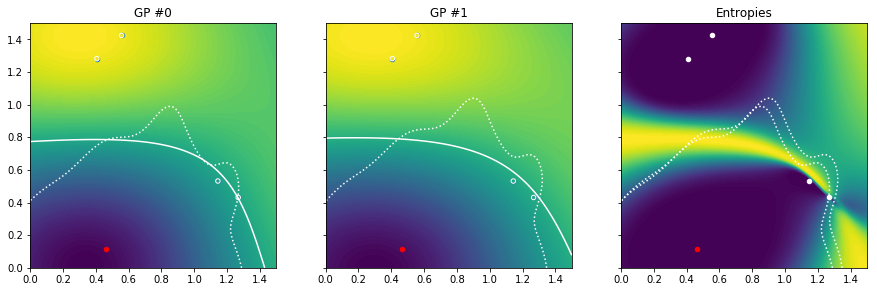

In [7]:
import excursion.plotting.twodim as plots
import excursion.utils as utils

fig, axarr = plt.subplots(1, 3, sharey=True)
fig.set_size_inches(15, 4.5)
plots.plot(axarr,gps,X,y_list,scandetails)
# plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))))
plt.show()

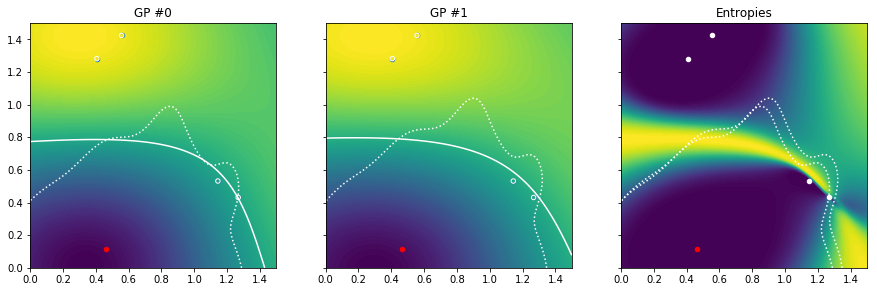

taking new x. best non-existent index 0 [1.3125 1.0125]
new x: [1.3125 1.0125]
new y i: 0 2.8396446843509118
new y i: 1 2.041845748342252


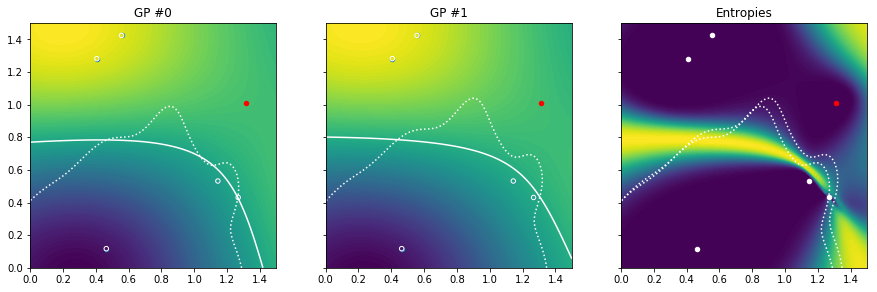

taking new x. best non-existent index 0 [0.4125 0.825 ]
new x: [0.4125 0.825 ]
new y i: 0 2.439099764197605
new y i: 1 2.291846486688313


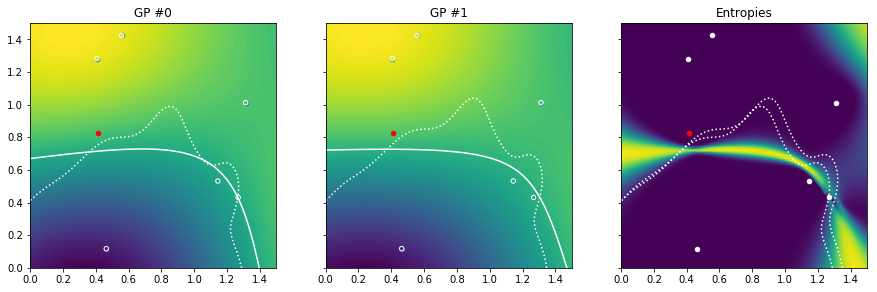

taking new x. best non-existent index 0 [1.35 0.3 ]
new x: [1.35 0.3 ]
new y i: 0 2.662105296510776
new y i: 1 1.3357479836968293


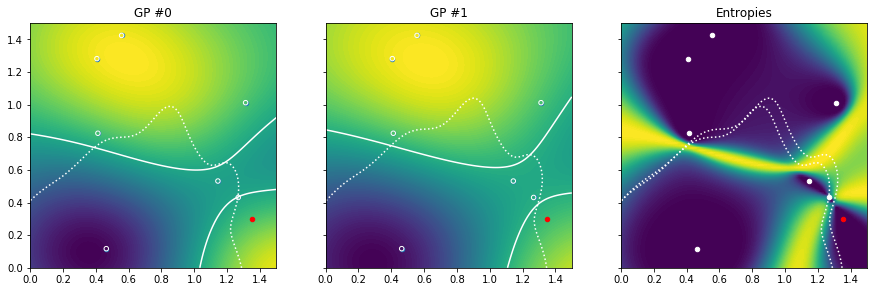

taking new x. best non-existent index 0 [1.2  0.45]
new x: [1.2  0.45]
new y i: 0 -0.6865136024489109
new y i: 1 -0.5766075574546758


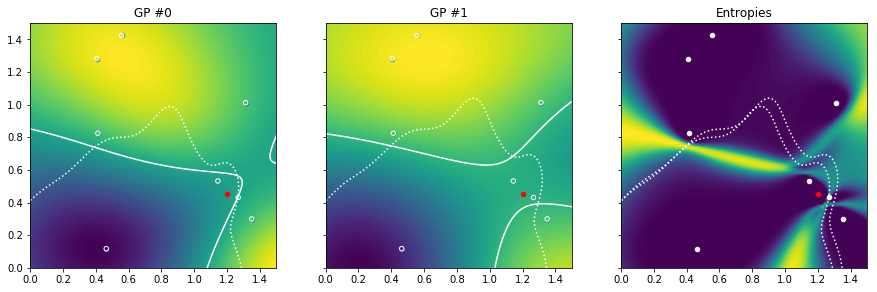

taking new x. best non-existent index 0 [0.1875 0.7875]
new x: [0.1875 0.7875]
new y i: 0 7.966377933188251
new y i: 1 7.900148255617873


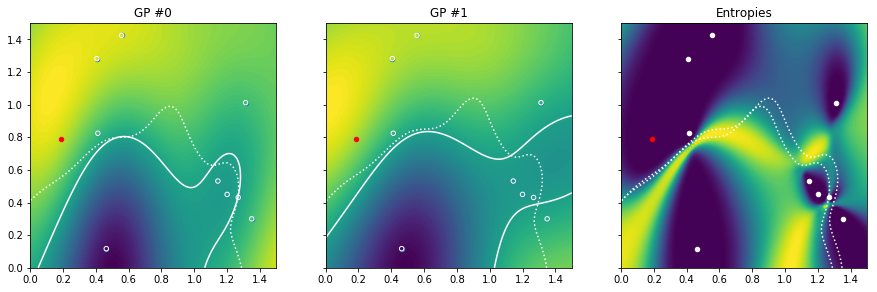

taking new x. best non-existent index 0 [0.9375 0.45  ]
new x: [0.9375 0.45  ]
new y i: 0 -4.047113928948567
new y i: 1 -5.535220826308757


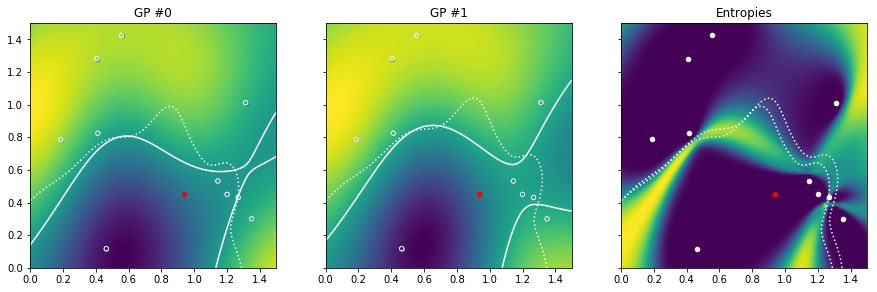

taking new x. best non-existent index 0 [0.1125 0.3   ]
new x: [0.1125 0.3   ]
new y i: 0 -7.560099491369618
new y i: 1 -8.655875522477558


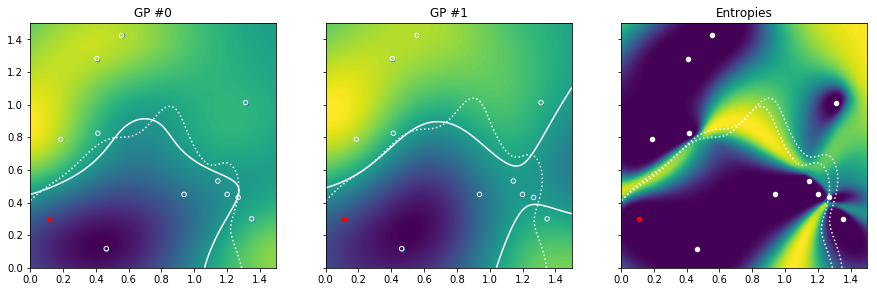

taking new x. best non-existent index 0 [0.9   0.975]
new x: [0.9   0.975]
new y i: 0 0.15038291507060952
new y i: 1 -0.7218750054829104


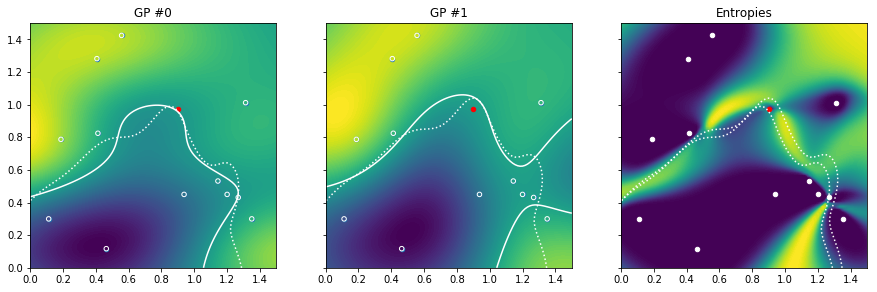

taking new x. best non-existent index 0 [1.2    1.2375]
new x: [1.2    1.2375]
new y i: 0 3.1953595289061343
new y i: 1 3.081763093522024


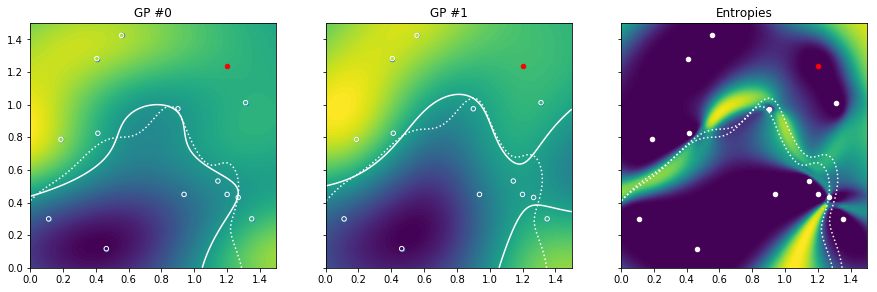

taking new x. best non-existent index 0 [0.9375 0.9375]
new x: [0.9375 0.9375]
new y i: 0 0.4262030416661946
new y i: 1 -0.8159305490619868


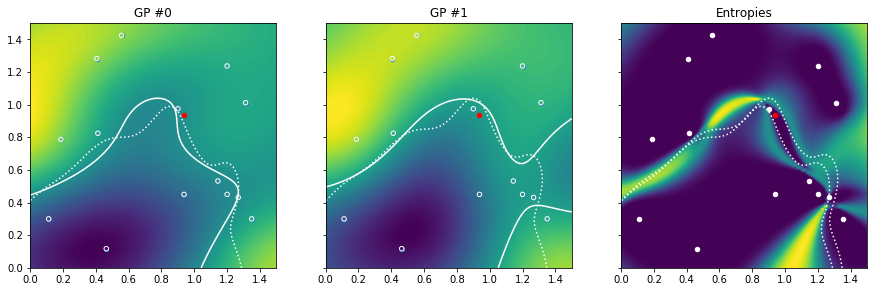

taking new x. best non-existent index 0 [1.125 0.225]
new x: [1.125 0.225]
new y i: 0 -0.2123687132524852
new y i: 1 -0.6112685949454657


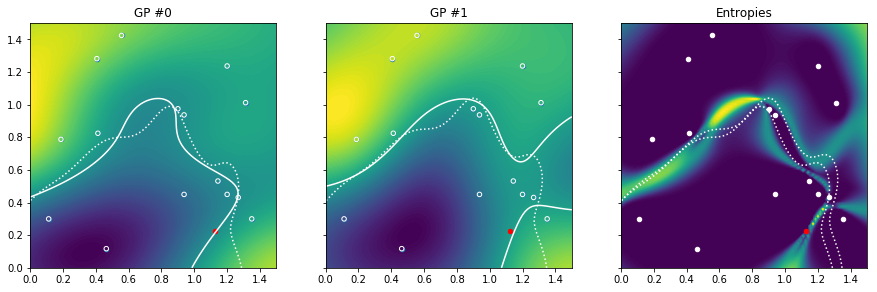

taking new x. best non-existent index 0 [1.0875 1.0125]
new x: [1.0875 1.0125]
new y i: 0 2.417220959912458
new y i: 1 2.0926385129609097


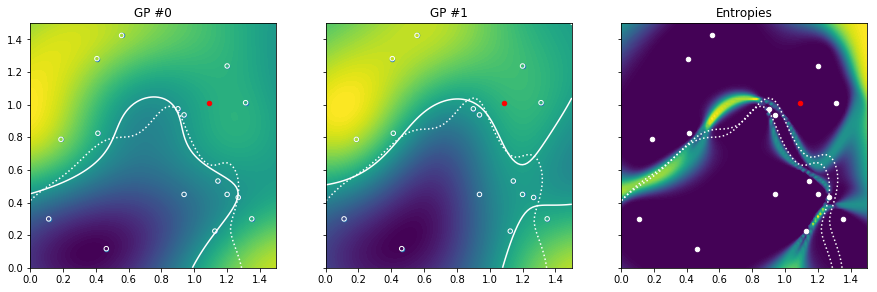

taking new x. best non-existent index 0 [1.425 1.35 ]
new x: [1.425 1.35 ]
new y i: 0 6.42587472199173
new y i: 1 5.375863572524031


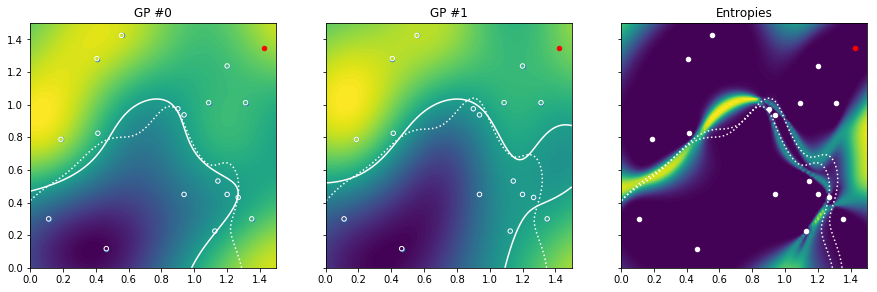

taking new x. best non-existent index 0 [1.425 0.675]
new x: [1.425 0.675]
new y i: 0 4.65805761783397
new y i: 1 3.1689510762420774


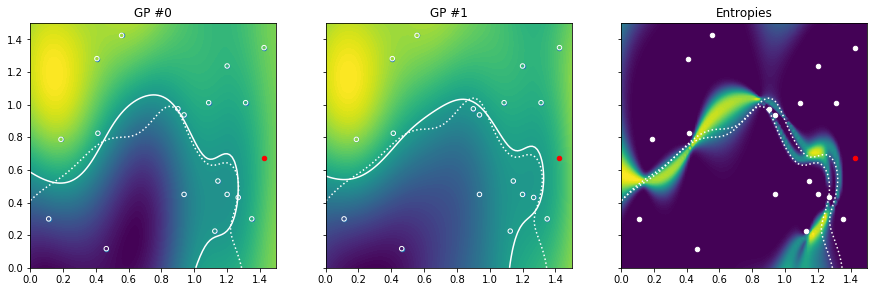

taking new x. best non-existent index 0 [0.6 0.9]
new x: [0.6 0.9]
new y i: 0 2.115458506452127
new y i: 1 1.2721710675017146


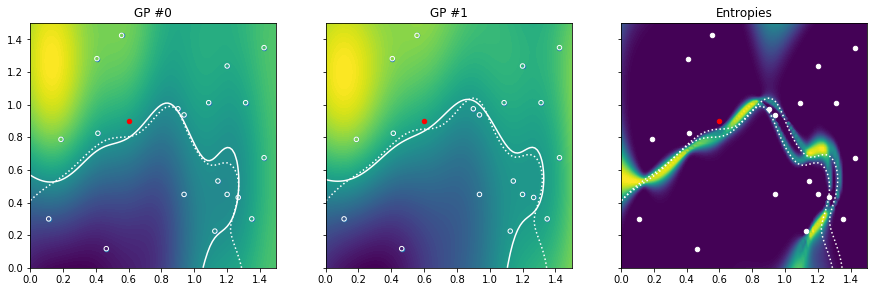

taking new x. best non-existent index 0 [0.0375 0.6   ]
new x: [0.0375 0.6   ]
new y i: 0 6.7237179220369985
new y i: 1 6.746809669710153


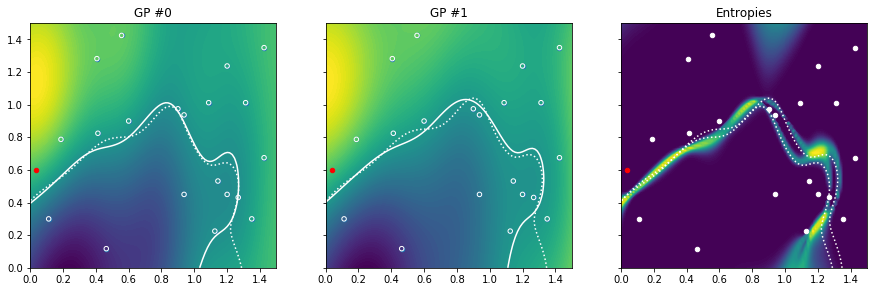

taking new x. best non-existent index 0 [0.9375 1.125 ]
new x: [0.9375 1.125 ]
new y i: 0 2.168444946510304
new y i: 1 1.1150523374112553


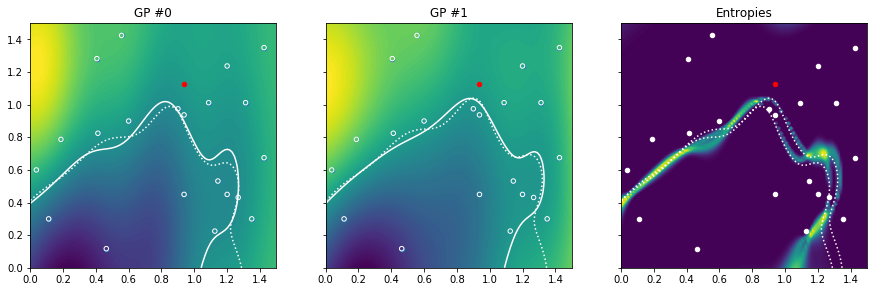

taking new x. best non-existent index 0 [1.1625 0.525 ]
new x: [1.1625 0.525 ]
new y i: 0 -0.6697950440016451
new y i: 1 -0.6980542932275222


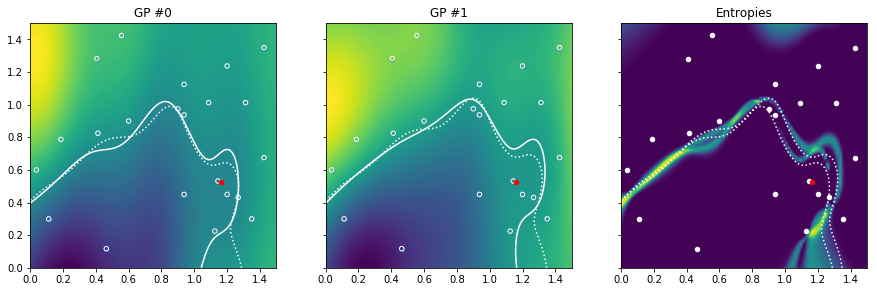

taking new x. best non-existent index 0 [1.2    0.1875]
new x: [1.2    0.1875]
new y i: 0 -0.19962910063406447
new y i: 1 -0.48021692206676825


In [ ]:
N_UPDATES = 50

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
for index in range(N_UPDATES):
    gps = [excursion.get_gp(X,y_list[i]) for i in range(N_FUNCS)]

    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(15, 4.5)
    plots.plot(axarr,gps,X,y_list,scandetails)
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))))
    plt.show()

    newx, acqvals = excursion.optimize.gridsearch(gps, X, scandetails)

    print('new x: {}'.format(newx))
    newy_list = [scandetails.truth_functions[i](np.asarray([newx]))[0] for i in range(N_FUNCS)]
    for i,newy in enumerate(newy_list):
        print('new y i: {} {}'.format(i,newy))
        y_list[i] = np.concatenate([y_list[i],[newy]])
    X = np.concatenate([X,np.array([newx])])